In [1]:
from Bio import SeqIO

In [2]:
fastaseq = SeqIO.parse("files\\subsampled\\aligned.fasta", "fasta") #sequences ist die bereits die alignierte subsampled file

In [3]:
inf = []
seq = []
seqlen = []

for seq_record in fastaseq:
    print(seq_record.id)
    inf.append(seq_record.id)
    print(repr(seq_record.seq))
    seq.append(seq_record.seq)
    print(len(seq_record),"\n")
    seqlen.append(len(seq_record))
    
    
print("x")

UGA/MUWRP-KIR210110S/2021
Seq('------------------------------------------------------...---')
29903 

AUS/GC-277/2020
Seq('------------------------------------------TCGATCTCTTGT...---')
29903 

ZAF/NHLS-UCT-PA-J093/2022
Seq('--------------------------------------------------TTGT...---')
29903 

BRA/HRMS_1724/2020
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')
29903 

USA/WA-CDC-UW22121236470/2022
Seq('------------------------------------------------------...---')
29903 

RUS/6228/2022
Seq('---------------------AGGTAACAAACCAACCAACTTTCGATCTCTTGT...---')
29903 

Switzerland/BL-ETHZ-38006259/2022
Seq('NNNNNNNNNNNNNNNNNNNNNNNGAAACAAACCAACCAACTTTCGATCTCTTGT...NNN')
29903 

ZAF/NHLS-UCT-LA-ZB67/2022
Seq('--------------------------------------------------TTGT...---')
29903 

Liechtenstein/FL-Risch-1006R14257/2022
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')
29903 

THA/CONI-3829/2022
Seq('------------------------------------------------------...---')

Liechtenstein/FL-Risch-1217R15237/2022
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')
29903 

PER/00001AAFAV/2022
Seq('------------------------------------------------------...---')
29903 

EGY/CCHE57357_Wave_3_A_052/2021
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')
29903 

England/PLYM-32579787/2022
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTTGT...NNN')
29903 

BHR/1102346/2023
Seq('--------------------------------------------------TTGT...---')
29903 

BHR/23480000484/2023
Seq('------------------------------------------------------...---')
29903 

Switzerland/BE-IFIK-230213_os_10/2023
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTTTCGATCTCTTGT...NNN')
29903 

Switzerland/BE-SRO-5000149551/2022
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTGT...NNN')
29903 

Liechtenstein/FL-Risch-1130R15065/2022
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')
29903 

ZAF/NHLS-UCT-GS-CD78/2022
Seq('-----------------

In [4]:
#https://biopython.org/wiki/Phylo
#Siehe Anleitung für "Distance Tree Constructor"

In [5]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import AlignIO

In [6]:
#Alignment einlesen aus der Originaldatei. aln ist Kurzform für alignment
aln = AlignIO.read("files\\subsampled\\aligned.fasta", "fasta")

In [7]:
# Distanzmatrix erstellen
calculator = DistanceCalculator('identity')

In [22]:
alnsubset = aln[:30] #die get_distance Methode dauert sehr lange auf großen Datasets

In [23]:
dm = calculator.get_distance(alnsubset)

In [24]:
dm

DistanceMatrix(names=['UGA/MUWRP-KIR210110S/2021', 'AUS/GC-277/2020', 'ZAF/NHLS-UCT-PA-J093/2022', 'BRA/HRMS_1724/2020', 'USA/WA-CDC-UW22121236470/2022', 'RUS/6228/2022', 'Switzerland/BL-ETHZ-38006259/2022', 'ZAF/NHLS-UCT-LA-ZB67/2022', 'Liechtenstein/FL-Risch-1006R14257/2022', 'THA/CONI-3829/2022', 'KEN/SS11201/2022', 'Liechtenstein/FL-Risch-1121R14867/2022', 'PER/00051AAHKY/2022', 'EGY/Egypt-Army-Thirdwave356/2021', 'MDA/ICGEB_810217_S12/2021', 'VNM/OUCRU-NHTD3554/2022', 'ZAF/NHLS-UCT-GS-CD21/2022', 'Japan/SZ-NIG-Y221821/2022', 'KEN/SS11092/2022', 'USA/WY-CDC-ASC210344339/2021', 'England/QEUH-325D3E95/2022', 'SouthAfrica/NHLS-UCT-GS-H348/2021', 'SouthAfrica/NHLS-UCT-GS-3309/2020', 'OX358443', 'USA/PR-CDC-2-6543385/2022', 'FRA/IHUCOVID-034484_Nova1/2021', 'IND/NGS-198/2022', 'ZAF/NHLS-UCT-LA-ZB48/2022', 'KEN/C119562/2022', 'OU470847'], matrix=[[0], [0.012908403839079652, 0], [0.005785372705079728, 0.01565060361836601, 0], [0.005885697087248731, 0.014580476875229897, 0.0087282212487040

In [25]:
#Aus der Distanzmatrix einen Baum erstellen mit Neighbor Joining
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator, 'nj')
tree = constructor.build_tree(alnsubset)

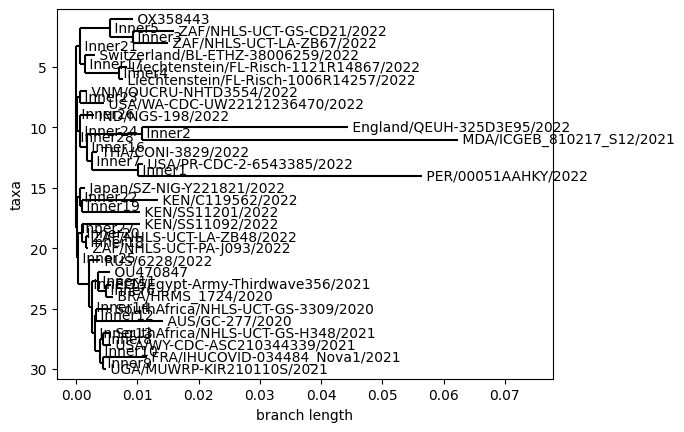

In [35]:
#Den Baum darstellen mit Wurzel
tree.ladderize()  # Flip branches so deeper clades are displayed at top
Phylo.draw(tree) #Alternativ: Phylo.draw_ascii(tree)